<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.066448,29.514032,38.415487,-539.715572,-367.719605,-614.224988,246.505383
1,0.0,1.0,93.841476,55.391297,77.757558,22.161525,259.151856,752.035024,-492.883168
2,0.0,2.0,72.402016,53.439430,23.826671,122.689362,282.357479,36.004739,246.352739
3,0.0,3.0,88.739847,94.224030,45.067604,-1434.090097,-1196.058616,1657.592091,-2853.650707
4,0.0,4.0,28.125903,22.956163,38.039019,-369.818840,-270.697755,-759.367411,488.669655
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.590224,20.817420,38.227828,-306.024046,-156.388573,-331.173170,174.784597
59996,999.0,56.0,22.578518,67.954840,69.419614,1274.890780,1444.843753,533.363667,911.480086
59997,999.0,57.0,28.960053,68.876005,58.923829,-6115.219951,-5948.460064,426.908160,-6375.368224
59998,999.0,58.0,38.887209,29.210672,86.526663,-47.147381,117.477162,308.171441,-190.694279


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.066448,29.514032,38.415487,-539.715572,-367.719605,-614.224988,246.505383
1,0.0,1.0,93.841476,55.391297,77.757558,22.161525,259.151856,752.035024,-492.883168
2,0.0,2.0,72.402016,53.439430,23.826671,122.689362,282.357479,36.004739,246.352739
3,0.0,3.0,88.739847,94.224030,45.067604,-1434.090097,-1196.058616,1657.592091,-2853.650707
4,0.0,4.0,28.125903,22.956163,38.039019,-369.818840,-270.697755,-759.367411,488.669655
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.590224,20.817420,38.227828,-306.024046,-156.388573,-331.173170,174.784597
59996,999.0,56.0,22.578518,67.954840,69.419614,1274.890780,1444.843753,533.363667,911.480086
59997,999.0,57.0,28.960053,68.876005,58.923829,-6115.219951,-5948.460064,426.908160,-6375.368224
59998,999.0,58.0,38.887209,29.210672,86.526663,-47.147381,117.477162,308.171441,-190.694279


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    94.066448  29.514032  ...  -614.224988   246.505383
      1.0    93.841476  55.391297  ...   752.035024  -492.883168
      2.0    72.402016  53.439430  ...    36.004739   246.352739
      3.0    88.739847  94.224030  ...  1657.592091 -2853.650707
      4.0    28.125903  22.956163  ...  -759.367411   488.669655
...                ...        ...  ...          ...          ...
999.0 55.0   80.590224  20.817420  ...  -331.173170   174.784597
      56.0   22.578518  67.954840  ...   533.363667   911.480086
      57.0   28.960053  68.876005  ...   426.908160 -6375.368224
      58.0   38.887209  29.210672  ...   308.171441  -190.694279
      59.0   89.530127  73.472477  ...   -72.104953 -1442.616240

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    94.066448  29.514032  ...  -614.224988   246.505383
      1.0    93.841476  55.391297  ...   752.035024  -492.883168
      2.0    72.402016  53.439430  ...    36.004739   246.352739
      3.0    88.739847  94.224030  ...  1657.592091 -2853.650707
      4.0    28.125903  22.956163  ...  -759.367411   488.669655
...                ...        ...  ...          ...          ...
999.0 55.0   80.590224  20.817420  ...  -331.173170   174.784597
      56.0   22.578518  67.954840  ...   533.363667   911.480086
      57.0   28.960053  68.876005  ...   426.908160 -6375.368224
      58.0   38.887209  29.210672  ...   308.171441  -190.694279
      59.0   89.530127  73.472477  ...   -72.104953 -1442.616240

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.066448,29.514032,38.415487,-539.715572,-367.719605,-614.224988,246.505383
1,0.0,1.0,93.841476,55.391297,77.757558,22.161525,259.151856,752.035024,-492.883168
2,0.0,2.0,72.402016,53.439430,23.826671,122.689362,282.357479,36.004739,246.352739
3,0.0,3.0,88.739847,94.224030,45.067604,-1434.090097,-1196.058616,1657.592091,-2853.650707
4,0.0,4.0,28.125903,22.956163,38.039019,-369.818840,-270.697755,-759.367411,488.669655
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.590224,20.817420,38.227828,-306.024046,-156.388573,-331.173170,174.784597
59996,999.0,56.0,22.578518,67.954840,69.419614,1274.890780,1444.843753,533.363667,911.480086
59997,999.0,57.0,28.960053,68.876005,58.923829,-6115.219951,-5948.460064,426.908160,-6375.368224
59998,999.0,58.0,38.887209,29.210672,86.526663,-47.147381,117.477162,308.171441,-190.694279


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    94.066448  29.514032  ...  -614.224988   246.505383
      1.0    93.841476  55.391297  ...   752.035024  -492.883168
      2.0    72.402016  53.439430  ...    36.004739   246.352739
      3.0    88.739847  94.224030  ...  1657.592091 -2853.650707
      4.0    28.125903  22.956163  ...  -759.367411   488.669655
...                ...        ...  ...          ...          ...
999.0 55.0   80.590224  20.817420  ...  -331.173170   174.784597
      56.0   22.578518  67.954840  ...   533.363667   911.480086
      57.0   28.960053  68.876005  ...   426.908160 -6375.368224
      58.0   38.887209  29.210672  ...   308.171441  -190.694279
      59.0   89.530127  73.472477  ...   -72.104953 -1442.616240

[60000 rows x 7 columns]

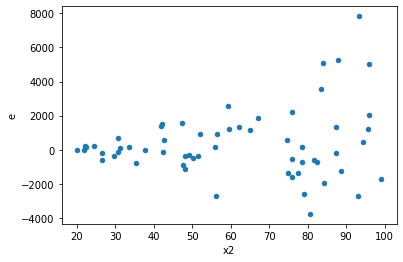

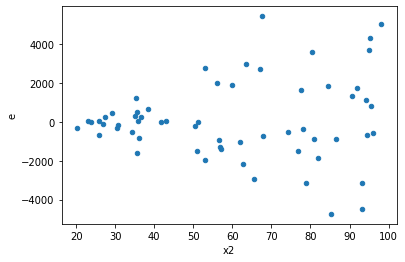

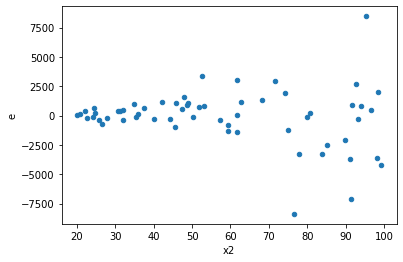

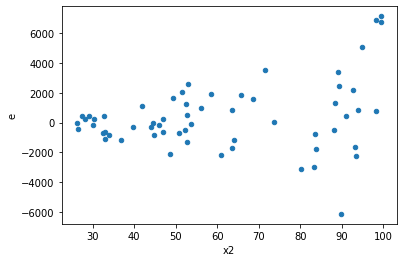

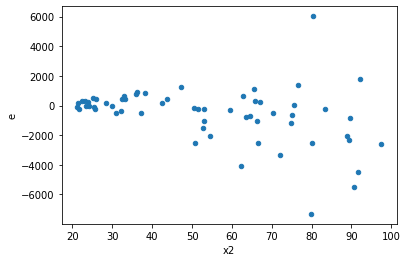

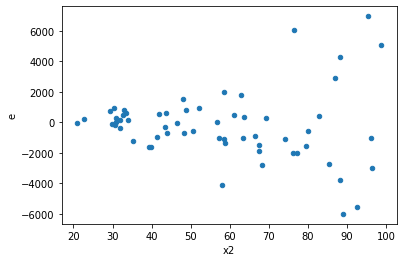

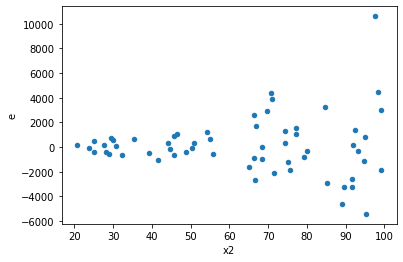

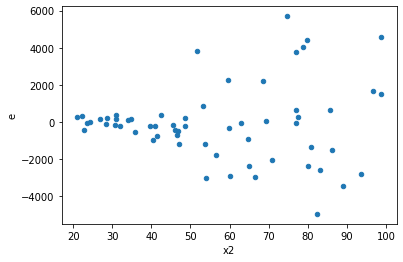

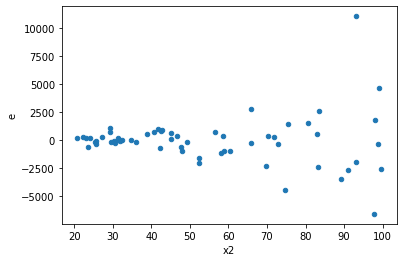

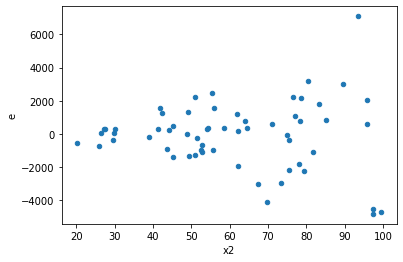

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,5562433.169774058,240485212.36719513,264877.76998924086,11451676.779390244,43.233816034676686,1.5518697438210438e-12,0.9999999999992241,7.759348719105219e-13,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,11211072.462707223,150018620.93125948,533860.5934622487,7143743.8538695,13.381290811408542,1.3502619378158442e-07,0.9999999324869031,6.751309689079221e-08,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,8701525.017862326,181096540.5227461,414358.3341839203,8623644.786797432,20.81204618167442,2.112591435121658e-09,0.9999999989437043,1.056295717560829e-09,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,5826493.4035140015,149725219.96607456,277452.06683400006,7129772.379336883,25.697312190514825,2.7288615811471573e-10,0.9999999998635569,1.3644307905735786e-10,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,21685594.639797535,115908142.97629309,1032647.3637998826,5519435.379823481,5.344937268336547,0.0003124438378794281,0.9998437780810603,0.00015622191893971404,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,18969588.544298086,364867197.26517826,903313.7402046708,17374628.441198964,19.23432321228974,4.49948145408996e-09,0.9999999977502593,2.24974072704498e-09,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,8993306.937571594,135518766.99528897,428252.71131293307,6453274.618823284,15.068847081058511,4.503940531641604e-08,0.9999999774802973,2.251970265820802e-08,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,10522679.28935095,220439326.91686794,501079.966159569,10497110.80556514,20.94897324676184,1.9833508169142533e-09,0.9999999990083246,9.916754084571267e-10,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,11098725.847574536,107540658.15600736,528510.7546464065,5120983.721714636,9.689459820246736,2.4326852494649387e-06,0.9999987836573753,1.2163426247324693e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,5562433.169774058,240485212.36719513,264877.76998924086,11451676.779390244,43.233816034676686,1.5518697438210438e-12,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,11211072.462707223,150018620.93125948,533860.5934622487,7143743.8538695,13.381290811408542,1.3502619378158442e-07,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,8701525.017862326,181096540.5227461,414358.3341839203,8623644.786797432,20.81204618167442,2.112591435121658e-09,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,5826493.4035140015,149725219.96607456,277452.06683400006,7129772.379336883,25.697312190514825,2.7288615811471573e-10,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,21685594.639797535,115908142.97629309,1032647.3637998826,5519435.379823481,5.344937268336547,0.0003124438378794281,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,18969588.544298086,364867197.26517826,903313.7402046708,17374628.441198964,19.23432321228974,4.49948145408996e-09,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,8993306.937571594,135518766.99528897,428252.71131293307,6453274.618823284,15.068847081058511,4.503940531641604e-08,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,10522679.28935095,220439326.91686794,501079.966159569,10497110.80556514,20.94897324676184,1.9833508169142533e-09,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,11098725.847574536,107540658.15600736,528510.7546464065,5120983.721714636,9.689459820246736,2.4326852494649387e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64